# Plan

*  solu uno universo
*  precio de neg igual al ultimo oficial
* se calcular vend y comp activos según estado
* qutar variables clientes 


# Librerías y configuraciones generales

In [1]:
import pandas as pd
from random import randrange
import random
import math
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
import warnings

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Preprocesamiento 
* Carga datos de entrada

In [4]:
rango_lectura=['2020-10-09','2021-05-18']
rango_indice=['2020-09-09','2021-05-18']

In [5]:
base_rss = pd.read_csv (r'TranformacionBases_Java/Rss_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')
base_twitter = pd.read_csv (r'TranformacionBases_Java/Twitter_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [6]:
# rangos datos lecturas
print("rango rss: min: ",min(base_rss['date_adj']), " max: ",max(base_rss['date_adj']))
print("rango twitter: min: ",min(base_twitter['date']), " max: ",max(base_twitter['date']))

rango rss: min:  2020-10-09  max:  2021-05-18
rango twitter: min:  2020-10-05  max:  2021-05-30


In [7]:
datos_twitter=base_twitter[['id_fuente','date','polaridad']].groupby(['id_fuente','date']).mean().reset_index()
#datos_twitter

In [8]:
datos_twitter['date'] = pd.to_datetime(datos_twitter['date']).dt.date

In [9]:
datos_rss=base_rss[['fuenteRss','date','polaridad']].groupby(['fuenteRss','date']).mean().reset_index()
#datos_rss

In [10]:
datos_rss['date'] = pd.to_datetime(datos_rss['date']).dt.date

### Eliminar dias sin lecturas

In [11]:
## empezar desde el 9 de octubre

In [12]:
val_twitter=datos_twitter[['date','id_fuente']].groupby('date').count()

In [13]:
#val_twitter[val_twitter['id_fuente']<val_twitter['id_fuente'].mean()-(val_twitter['id_fuente'].std())*1.64]

In [14]:
val_rss=datos_rss[['date','fuenteRss']].groupby('date').count()
#val_rss

In [15]:
#val_rss[val_rss['fuenteRss']<val_rss['fuenteRss'].mean()-(val_rss['fuenteRss'].std())*1.7]

In [16]:
## fin validacion rss

In [17]:
fechas_quitar=list(val_twitter[val_twitter['id_fuente']<val_twitter['id_fuente'].mean()-(val_twitter['id_fuente'].std())*1.64].index)

In [18]:
fechas_quitar=fechas_quitar+list(val_rss[val_rss['fuenteRss']<val_rss['fuenteRss'].mean()-(val_rss['fuenteRss'].std())*1.7].index)

In [19]:
fechas_quitar

[datetime.date(2020, 10, 5),
 datetime.date(2020, 10, 6),
 datetime.date(2020, 10, 7),
 datetime.date(2020, 10, 8),
 datetime.date(2020, 10, 21),
 datetime.date(2020, 10, 22),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 24),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 21),
 datetime.date(2020, 10, 13),
 datetime.date(2020, 10, 14),
 datetime.date(2020, 10, 15),
 datetime.date(2020, 10, 16),
 datetime.date(2020, 10, 17),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 10, 19),
 datetime.date(2020, 10, 20),
 datetime.date(2020, 10, 21),
 datetime.date(2020, 10, 22),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 24),
 datetime.date(2020, 12, 10),
 datetime.date(2021, 5, 18),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 10, 1)]

In [20]:
## eliminar duplicados

In [21]:
fechas_quitar = list(dict.fromkeys(fechas_quitar))

In [22]:
##igualar rangos

In [23]:
datos_trm=pd.read_csv (r'TranformacionBases_Java/TRM_total_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [24]:
datos_trm=datos_trm[datos_trm['date']>=rango_indice[0]]
datos_trm=datos_trm[datos_trm['date']<=rango_indice[1]]

In [25]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.21,54.59,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.09,-6.00,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16,2021-05-17


In [26]:
datos_trm['date'] = pd.to_datetime(datos_trm['date']).dt.date

In [27]:
datos_twitter.columns=['fuente','date','polaridad']
datos_rss.columns=['fuente','date','polaridad']

In [28]:
#datos_rss

In [29]:
datos_lectura=datos_twitter.append(datos_rss)

In [30]:
#datos_lectura

In [31]:
pd.to_datetime(rango_lectura[0]).date()

datetime.date(2020, 10, 9)

In [32]:
#datos_lectura=datos_lectura[datos_lectura['date']>=rango_lectura[0]]
#datos_lectura=datos_lectura[datos_lectura['date']<=rango_lectura[1]]
datos_lectura=datos_lectura[datos_lectura['date']>=pd.to_datetime(rango_lectura[0]).date()]
datos_lectura=datos_lectura[datos_lectura['date']<=pd.to_datetime(rango_lectura[1]).date()]

In [33]:
datos_lectura=datos_lectura[datos_lectura['polaridad']!=0]

In [34]:
datos_lectura

,fuente,date,polaridad
0,BluRadioCo,2020-10-09,-0.347026
1,BluRadioCo,2020-10-10,-0.271511
2,BluRadioCo,2020-10-11,-0.635847
3,BluRadioCo,2020-10-25,-0.249044
4,BluRadioCo,2020-10-26,-0.410109
...,...,...,...
109898,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.719400
109899,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.960484
109900,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.977641
109901,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.882855


## Carga Maestro Fuentes

In [35]:
base_maestro_fuentes = pd.read_csv (r'TranformacionBases_Java/maestro_fuentes.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [36]:
base_maestro_fuentes.reset_index()

,index,fuente,tipo
0,0,http://elnacional.com.do/feed/,rss
1,1,http://ep00.epimg.net/rss/economia/portada.xml,rss
2,2,http://ep00.epimg.net/rss/tags/ultimas_noticia...,rss
3,3,http://feeds.nytimes.com/nyt/rss/Business,rss
4,4,http://feeds.nytimes.com/nyt/rss/Technology,rss
...,...,...,...
132,132,elcolombiano,twitter
133,133,elespectador,twitter
134,134,lafm,twitter
135,135,rcnmundo,twitter


In [37]:
datos_lectura=datos_lectura.merge(base_maestro_fuentes.reset_index(), left_on='fuente', right_on='fuente', how='left')
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09,-0.347026,118,twitter
1,BluRadioCo,2020-10-10,-0.271511,118,twitter
2,BluRadioCo,2020-10-11,-0.635847,118,twitter
3,BluRadioCo,2020-10-25,-0.249044,118,twitter
4,BluRadioCo,2020-10-26,-0.410109,118,twitter
...,...,...,...,...,...
78606,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.719400,117,rss
78607,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.960484,117,rss
78608,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.977641,117,rss
78609,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.882855,117,rss


In [38]:
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09,-0.347026,118,twitter
1,BluRadioCo,2020-10-10,-0.271511,118,twitter
2,BluRadioCo,2020-10-11,-0.635847,118,twitter
3,BluRadioCo,2020-10-25,-0.249044,118,twitter
4,BluRadioCo,2020-10-26,-0.410109,118,twitter
...,...,...,...,...,...
78606,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.719400,117,rss
78607,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.960484,117,rss
78608,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.977641,117,rss
78609,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.882855,117,rss


## Calendario

In [39]:
calendario = pd.DataFrame({"Date": pd.date_range(rango_indice[0], rango_indice[1])})

In [40]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
247,2021-05-14
248,2021-05-15
249,2021-05-16
250,2021-05-17


In [41]:
### remover dias seleccionados
fechas_quitar

[datetime.date(2020, 10, 5),
 datetime.date(2020, 10, 6),
 datetime.date(2020, 10, 7),
 datetime.date(2020, 10, 8),
 datetime.date(2020, 10, 21),
 datetime.date(2020, 10, 22),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 24),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 21),
 datetime.date(2020, 10, 13),
 datetime.date(2020, 10, 14),
 datetime.date(2020, 10, 15),
 datetime.date(2020, 10, 16),
 datetime.date(2020, 10, 17),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 10, 19),
 datetime.date(2020, 10, 20),
 datetime.date(2020, 12, 10),
 datetime.date(2021, 5, 18),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 10, 1)]

In [42]:
calendario=calendario[~calendario['Date'].isin(fechas_quitar)]

In [43]:
calendario=calendario.reset_index(drop=True)

In [44]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
226,2021-05-13
227,2021-05-14
228,2021-05-15
229,2021-05-16


In [45]:
calendario['Date']=pd.to_datetime(calendario['Date']).dt.date

## Construcción nueva serie de valor del indice

In [190]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.21,54.59,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.09,-6.00,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16,2021-05-17


In [ ]:
#serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
#serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

In [ ]:
#reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
#rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

In [222]:
FECHA_INICIAL_PULSO=36

In [223]:
serieVariable=calendario.merge(datos_trm[['date','TRM']], left_on=['Date'], right_on=['date'],  how='left')

In [224]:
serieVariable=serieVariable[serieVariable.index<FECHA_INICIAL_PULSO][['TRM']]
serieVariable.columns=['valor']
serieVariable

,valor
0,3757.21
1,3717.25
2,3700.28
3,3709.00
4,3709.00
5,3709.00
6,3697.00
7,3683.49
8,3703.86
9,3714.65


# Agente

In [46]:
def crearAgente(id): #quizas falta el valor del var econ,
    agente={}
    agente['TIPO']='indefinido'
    agente['id']=id
    agente['edad']=0
    agente['capital']= randrange(1000,1000000000)
    agente['stockProducto']=randrange(10,1000000)
    agente['umbralStock']=randrange(10,1000000)
    agente['habilidadAdministrativa']=random.uniform(-0.02, 0.5)
    #agente['tasaConsumo']=random.uniform(0.1, 0.5)
    """
    if agente['TIPO']=='Comprador':
        agente['rentabilidad']=random.uniform(0.1, 0.2)
    elif agente['TIPO']=='Vendedor':
        agente['rentabilidad']=random.uniform(0.1, 0.2)
    """
    agente['rentabilidad']=random.uniform(0.1, 0.2)
    agente['tamanoRegresion']= randrange(5,20)
    # perfilIntereses  No aplica
    agente['impactoTextos']=random.uniform(-1, 1)
    agente['estrategiaLectura']=[0]*NUM_FUENTES_INTERPRETACION
    agente['estrategiaLectura_imp']=[0]*NUM_FUENTES_INTERPRETACION
    for i in range(NUM_FUENTES_INTERPRETACION):
        agente['estrategiaLectura'][i]=randrange(NUM_FUENTES_TOTATALES)
        agente['estrategiaLectura_imp'][i]=random.random()
    agente['numeroDiasLecturas']=randrange(2,7)
    agente['umbralPronostico']=random.uniform(0.05, 0.15)
    agente['porcentajeCapitalCompra']=random.uniform(0, 1)
    agente['porcentajeStockVenta']=random.uniform(0, 1)
    #agente['costoMauc']  costo del commoditie según bolsa
    #agente['costosFijos']=random.uniform(0.1, 0.3)
    """agente['tasaProduccion']=random.uniform(0, 0.5)"""
    #agente['limiteSobrePrecio']=random.uniform(0.01, 0.3)
    agente['viveza']=random.uniform(0.05, 1)
    #agente['vivezaVendedor']=random.uniform(0.05, 0.2)    
    agente['controlGastosEImpuestos']=random.uniform(0.1, 0.3)
    
    agentesCreados.append(agente)
    return agente

In [ ]:
def pronosticoAgente_old(agente):    
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
    rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
    serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

    modelo_agente=SimpleExpSmoothing(serie_indice_agente['TRM']).fit(smoothing_level=0.8,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()

    prediccion_base_agente=prediccion_base_agente.values[0]
    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})

    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']
    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]
    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
        
    return pronosticos_dia_siguiente

In [47]:
def pronosticoAgente(agente):    
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
    #rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]
    
    
    #serieVariable

    #serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
    #serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]
    
    serie_indice_agente=serieVariable[reg_inicio:]

    modelo_agente=SimpleExpSmoothing(serie_indice_agente['valor']).fit(smoothing_level=0.8,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()

    prediccion_base_agente=prediccion_base_agente.values[0]
    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})

    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']
    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]
    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
        
    return pronosticos_dia_siguiente

In [48]:
def activacionAgente(agente):
    
    #cuando
    agente['activo']=False
    agente['TIPO']='indefinido'
    agente['cantidadTransaccionar']=0
    #rol comprador
    if agente['pronosticos_dia_siguiente']>VALOR_MOMENTO_INDICE:
        #necesita stock?
        val_stock=agente['stockProducto']<agente['umbralStock']
         #el cambio del mercado le combiene?  prediccion - valor actual
        val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']*VALOR_MOMENTO_INDICE
        #agente['activo']=val_stock or val_conveniencia
        agente['activo']= val_conveniencia
        if agente['activo']:
            agente['TIPO']='comprador'
            agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar
            agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])
            #agente['precioNegociacion']=VALOR_MOMENTO_INDICE
            
    #rol vendedor
    if agente['pronosticos_dia_siguiente']<VALOR_MOMENTO_INDICE:
        #necesita stock?
        val_stock=agente['stockProducto']>agente['umbralStock']
        #el cambio del mercado le combiene?  prediccion - valor actual
        val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']*VALOR_MOMENTO_INDICE
        #agente['activo']=val_stock or val_conveniencia
        agente['activo']= val_conveniencia
        if agente['activo']:
            agente['TIPO']='vendedor'
            #cuanto vender
            agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']
            agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])    
            #agente['precioNegociacion']=VALOR_MOMENTO_INDICE
        
    #print(agente['id'], 'activo',agente['activo'],' tipo: ', agente['TIPO'], ' vi: ',VALOR_MOMENTO_INDICE, 'ps: ',agente['pronosticos_dia_siguiente'], 'up: ',agente['umbralPronostico'] ,'vup:',agente['umbralPronostico']*VALOR_MOMENTO_INDICE)    
    return agente['TIPO']

In [49]:
"""
def activacionVendedor(agente):
    #cuando vender
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']>agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto vender
    agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']
    #precio negociacion
    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1+agente['vivezaVendedor'])+VALOR_MOMENTO_INDICE
    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])    
    # los vendedores tienen la rentabilidad en le precio de negociación
    #agente['precioNegociacion']=agente['precioNegociacion']/(1-agente['rentabilidad'])
    
    return agente['activo']
"""

"\ndef activacionVendedor(agente):\n    #cuando vender\n    agente['activo']=False\n    #necesita stock?\n    val_stock=agente['stockProducto']>agente['umbralStock']\n    #el cambio del mercado le combiene?  prediccion - valor actual\n    val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']\n    #alguna de las 2 situaciones\n    agente['activo']=val_stock or val_conveniencia\n    #cuanto vender\n    agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']\n    #precio negociacion\n    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1+agente['vivezaVendedor'])+VALOR_MOMENTO_INDICE\n    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])    \n    # los vendedores tienen la rentabilidad en le precio de negociación\n    #agente['precioNegociacio

In [50]:
"""
def activacionComprador(agente):
    #cuando
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']<agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto comprar
    agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar
    #precio negociacion
       
    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE
    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])
    
    return agente['activo']"""

"\ndef activacionComprador(agente):\n    #cuando\n    agente['activo']=False\n    #necesita stock?\n    val_stock=agente['stockProducto']<agente['umbralStock']\n    #el cambio del mercado le combiene?  prediccion - valor actual\n    val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']\n    #alguna de las 2 situaciones\n    agente['activo']=val_stock or val_conveniencia\n    #cuanto comprar\n    agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar\n    #precio negociacion\n       \n    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE\n    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])\n    \n    return agente['activo']"

In [51]:
def transaccionarAgente(agenteComprador,agenteVendedor):
    #id agentes
    idComprador=agenteComprador.get('id')
    idVendedor=agenteVendedor.get('id')    
    #definir cantidad transaccionar
    cantidadRequeridaComprador=agenteComprador['cantidadTransaccionar']
    cantidadDisponibleVendedor=agenteVendedor['cantidadTransaccionar']
    cantidadTransaccion= cantidadRequeridaComprador if cantidadRequeridaComprador<cantidadDisponibleVendedor else cantidadDisponibleVendedor
    #precio transaccion
    precioTransaccion=agenteVendedor['precioNegociacion']
    #comision=precioTransaccion*0.05
    #numeroPulsoActual
    #FECHA_PULSO
    
    #Cambio estado agentes
    #comprador
    #agenteComprador['capital']=agenteComprador['capital']-precioTransaccion*(1.05)*cantidadTransaccion  #incluye comision
    agenteComprador['capital']=agenteComprador['capital']-precioTransaccion*cantidadTransaccion  #incluye comision
    ##sin costo mauc
    agenteComprador['stockProducto']=agenteComprador['stockProducto']+cantidadTransaccion
    agenteComprador['cantidadTransaccionar']=agenteComprador['cantidadTransaccionar']-cantidadTransaccion
    #vendedor
    #agenteVendedor['capital']=agenteVendedor['capital']+precioTransaccion*(1.05)*cantidadTransaccion
    agenteVendedor['capital']=agenteVendedor['capital']+precioTransaccion*cantidadTransaccion
    agenteVendedor['stockProducto']=agenteVendedor['stockProducto']-cantidadTransaccion
    agenteVendedor['cantidadTransaccionar']=agenteVendedor['cantidadTransaccionar']-cantidadTransaccion
    #validar activacion agentes, retornar para acciones
    desactivarComprador=agenteComprador['cantidadTransaccionar']==0
    desactivarVendedor=agenteVendedor['cantidadTransaccionar']==0
    lineaTransaccion=[idComprador,idVendedor,cantidadTransaccion,precioTransaccion,FECHA_PULSO,CICLO]
    #lineaTransaccion=[idComprador,idVendedor,cantidadTransaccion,precioTransaccion,FECHA_PULSO]
    #return {'desact_comp':desactivarComprador, 'desact_vend':desactivarVendedor, 'lineaTransaccion':lineaTransaccion}
    return [desactivarComprador, desactivarVendedor, lineaTransaccion]

In [52]:
def vivirAgente(agente):
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #aumentar edad
    agente['edad']=agente['edad']+1

In [53]:
"""
def vivirComprador(agente):
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #reevaluar costos fijos 
    #aumentar edad
    agente['edad']=agente['edad']+1
"""

"\ndef vivirComprador(agente):\n    #aprovecha unidades\n    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']\n    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas\n    #tiene gastos\n    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])\n    #recibe capital\n    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])\n    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento\n    #reevaluar costos fijos \n    #aumentar edad\n    agente['edad']=agente['edad']+1\n"

In [54]:
"""
def vivirVendedor(agente):
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #le cuesta producir
    agente['capital']=agente['capital']*(1-agente['habilidadAdministrativa'])*agente['tasaProduccion']
    #aumenta el stock con lo producido
    agente['stockProducto']=agente['stockProducto']+agente['stockProducto']*agente['tasaProduccion']
    #aumenta edad
    agente['edad']=agente['edad']+1
"""

"\ndef vivirVendedor(agente):\n    #tiene gastos\n    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])\n    #le cuesta producir\n    agente['capital']=agente['capital']*(1-agente['habilidadAdministrativa'])*agente['tasaProduccion']\n    #aumenta el stock con lo producido\n    agente['stockProducto']=agente['stockProducto']+agente['stockProducto']*agente['tasaProduccion']\n    #aumenta edad\n    agente['edad']=agente['edad']+1\n"

# Universo

In [55]:
#GENERACION ESPONTANEA UNIVERSO
def generacionEspontanea():     
    global NUMERO_ACUMULADO_AGENTES
    for i in range(POBLACION_INICIAL):
        NUMERO_ACUMULADO_AGENTES=NUMERO_ACUMULADO_AGENTES+1
        universo.append(crearAgente(NUMERO_ACUMULADO_AGENTES))
        """
        if(random.random()<=CANT_COMPRADORES):            
            compradores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Comprador'))
        else:
            vendedores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Vendedor'))"""

In [56]:
def quiebraEmpresas():
    #quiebraEmpresas  
    
    for ag in universo:
        capiltalEmpresa=ag['capital']
        valorStockEmpresa=ag['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("COMP capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraComp")
            universo.remove(ag)     
            agentesQuebrados.append(ag)
    
    """
    for comp in compradores:
        capiltalEmpresa=comp['capital']
        valorStockEmpresa=comp['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("COMP capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraComp")
            compradores.remove(comp)     
            agentesQuebrados.append(comp)
    
    
    for vend in vendedores:
        capiltalEmpresa=vend['capital']
        valorStockEmpresa=vend['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("VEND capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraVend")
            vendedores.remove(vend)
            agentesQuebrados.append(vend)"""

In [57]:
def nuevosAgentes():
    global NUMERO_ACUMULADO_AGENTES
    #num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    print("max_generacion_agentes: ",MAX_GENERACION_AGENTES,"nuevos Agentes: ", num_nuevos_agentes, "pob actual: ",POBLACION_ACTUAL, "pob final: ",POBLACION_ACTUAL+num_nuevos_agentes)
    for i in range(POBLACION_ACTUAL,POBLACION_ACTUAL+num_nuevos_agentes):
        NUMERO_ACUMULADO_AGENTES=NUMERO_ACUMULADO_AGENTES+1
        universo.append(crearAgente(NUMERO_ACUMULADO_AGENTES))
        """
        if(random.random()<=CANT_COMPRADORES):
            compradores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Comprador'))
        else:
            vendedores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Vendedor'))
        """
        #guardar en lista de agentes creados

In [58]:
def pronosticoUniverso():
    for ag in universo:
        #print(pronosticoAgente(comp))
        ag['pronosticos_dia_siguiente']=pronosticoAgente(ag)
    """
    for comp in compradores:
        #print(pronosticoAgente(comp))
        comp['pronosticos_dia_siguiente']=pronosticoAgente(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        vend['pronosticos_dia_siguiente']=pronosticoAgente(vend)
    """

In [59]:
def activacionUniverso():
    global VALOR_MOMENTO_INDICE    
    global compradoresActivos
    global vendedoresActivos
    
    for ag in universo:
        auxActivacion=activacionAgente(ag)
        if auxActivacion=='comprador':
            compradoresActivos.append(ag)
        elif auxActivacion=='vendedor':
            vendedoresActivos.append(ag)
            
    num_comprador=len(compradoresActivos)
    num_vendedor=len(vendedoresActivos)    
    
    while (num_comprador>num_vendedor*2) or (num_vendedor>num_comprador*2):    
        compradoresActivos=[]
        vendedoresActivos=[]
        
        if (num_comprador>num_vendedor*2):
            VALOR_MOMENTO_INDICE=VALOR_MOMENTO_INDICE*(1.02)
            
        elif (num_vendedor>num_comprador*2):
            VALOR_MOMENTO_INDICE=VALOR_MOMENTO_INDICE*(0.98)
        
        #print('nc: ',num_comprador, 'nv: ',num_vendedor, 'vmi: ',VALOR_MOMENTO_INDICE)
        
        #activacion universon hasta encontrar el precio adecuado
        for ag in universo:
            auxActivacion=activacionAgente(ag)
            if auxActivacion=='comprador':
                compradoresActivos.append(ag)
            elif auxActivacion=='vendedor':
                vendedoresActivos.append(ag)
                
        num_comprador=len(compradoresActivos)
        num_vendedor=len(vendedoresActivos) 
    
            
    """
    for comp in compradores:
        #print(pronosticoAgente(comp))
        auxActivacion=activacionComprador(comp)
        if auxActivacion:
            compradoresActivos.append(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        auxActivacion=activacionVendedor(vend)
        if auxActivacion:
            vendedoresActivos.append(vend)"""

In [60]:
### Función transaccionar
def transaccionarUniverso():
    random.shuffle(compradoresActivos)
    
    while (len(compradoresActivos)>0 and len(vendedoresActivos)>0):
        for comp in compradoresActivos:     
            if len(vendedoresActivos)==0:
                #print("no hay vendedores")
                break

            df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')
            mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
            compradorMomento=comp
            
            """
            (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
            if desactivarComprador:
                compradoresActivos.remove(compradorMomento)
            if desactivarVendedor:
                vendedoresActivos.remove(mejorVendedor) 
                #registra la transacción
            DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion"""
            
            precioMaximoCompra=compradorMomento['precioNegociacion']
            precioMinimoVenta=mejorVendedor['precioNegociacion']
            #selecciona si puede transaccionar
            if precioMaximoCompra>precioMinimoVenta:
                #print("transaccionar")
                #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
                (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
                #agregar transaccion a arreglo de transacciones con datos principales
                if desactivarComprador:
                    compradoresActivos.remove(compradorMomento)
                if desactivarVendedor:
                    vendedoresActivos.remove(mejorVendedor) 
                #registra la transacción
                DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion
            else :
                compradoresActivos.remove(compradorMomento)
           

In [61]:
def vivirUniverso():
    for ag in universo:
        vivirAgente(ag)
    """
    for comp in compradores:
        vivirComprador(comp)
    for vend in vendedores:
        vivirVendedor(vend)"""

# SIMULACION

## Parametros Globales

In [62]:
#AGENTES
NUM_FUENTES_TOTATALES=137
NUM_FUENTES_INTERPRETACION=5

In [63]:
#UNIVERSO
#POBLACION_INICIAL=50
POBLACION_INICIAL=100
"""CANT_COMPRADORES=0.6"""

#LIMITE_QUIEBRA=1000
LIMITE_QUIEBRA=10000000
#MAX_GENERACION_AGENTES=0.02
MAX_GENERACION_AGENTES=0.05

POBLACION_ACTUAL=0

In [64]:
FECHA_INICIAL_PULSO=36
FECHA_PULSO=FECHA_INICIAL_PULSO   #fecha inicial con información suficiente

In [65]:
NUMERO_ACUMULADO_AGENTES=0

In [66]:
#tipo_indice='real'
tipo_indice='emergente'

In [67]:
VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [68]:
#VALOR_MOMENTO_INDICE

In [69]:
DF_TRANSACCIONES=pd.DataFrame(columns=['idComprador','idVendedor','cantidadTransaccion','precioTransaccion','fechaPulso','ciclo']) ###llevar antes al algoritmo

In [70]:
#no aplica
"""compradores=[]
vendedores=[]"""
universo=[]

In [71]:
NUMERO_ACUMULADO_AGENTES

0

In [72]:
agentesQuebrados=[]

In [73]:
agentesCreados=[]

In [74]:
generacionEspontanea()

In [75]:
print("numAgentes: ",len(universo))

numAgentes:  100


In [76]:
##  Variable para realizar ciclos
CICLO=1

### ciclos simulacion

In [77]:
252-FECHA_PULSO

216

In [78]:
#pensar en agregar un número fijo de agentes

In [79]:
"""
aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']*aux_df_agentC['capital']
aux_df_agentC['pulso']=FECHA_PULSO-1
aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']*aux_df_agentV['capital']
aux_df_agentV['pulso']=FECHA_PULSO-1
df_estadoAgentes=aux_df_agentC
df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
df_estadoAgentes['ciclo']=CICLO
df_estadoAgentes"""

"\naux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]\naux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE\naux_df_agentC['val_empresa']=aux_df_agentC['val_stock']*aux_df_agentC['capital']\naux_df_agentC['pulso']=FECHA_PULSO-1\naux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]\naux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE\naux_df_agentV['val_empresa']=aux_df_agentV['val_stock']*aux_df_agentV['capital']\naux_df_agentV['pulso']=FECHA_PULSO-1\ndf_estadoAgentes=aux_df_agentC\ndf_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)\ndf_estadoAgentes['ciclo']=CICLO\ndf_estadoAgentes"

In [80]:
aux_df_agent=pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agent['val_stock']=aux_df_agent['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agent['val_empresa']=aux_df_agent['val_stock']*aux_df_agent['capital']
aux_df_agent['pulso']=FECHA_PULSO-1
aux_df_agent['ciclo']=CICLO
df_estadoAgentes=aux_df_agent

In [81]:
df_estadoAgentes

,id,TIPO,edad,capital,stockProducto,val_stock,val_empresa,pulso,ciclo
0,1,indefinido,0,310163028,293017,1.130624e+09,3.506777e+17,35,1
1,2,indefinido,0,891098166,80591,3.109652e+08,2.771005e+17,35,1
2,3,indefinido,0,330580745,168126,6.487243e+08,2.144557e+17,35,1
3,4,indefinido,0,400708082,301255,1.162410e+09,4.657873e+17,35,1
4,5,indefinido,0,458565940,241290,9.310319e+08,4.269395e+17,35,1
...,...,...,...,...,...,...,...,...,...
95,96,indefinido,0,340093357,507771,1.959265e+09,6.663330e+17,35,1
96,97,indefinido,0,910388965,208084,8.029046e+08,7.309555e+17,35,1
97,98,indefinido,0,619589776,984455,3.798579e+09,2.353561e+18,35,1
98,99,indefinido,0,621425109,704312,2.717630e+09,1.688804e+18,35,1


In [82]:
#df_estadoAgentes=pd.DataFrame.from_dict(compradores)
#df_estadoAgentes=df_estadoAgentes.append(pd.DataFrame.from_dict(vendedores))

# Validación ciclo

In [83]:
#aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
#aux_df_transacciones

In [84]:
"""
if tipo_indice=='real' or len(aux_df_transacciones)==0:
    print('trm real')
    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
elif tipo_indice=='emergente':
    print('trm simuladas')
    aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
    #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
    VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
"""

"\nif tipo_indice=='real' or len(aux_df_transacciones)==0:\n    print('trm real')\n    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']\nelif tipo_indice=='emergente':\n    print('trm simuladas')\n    aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']\n    #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()\n    VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()\n"

In [85]:
#VALOR_MOMENTO_INDICE

In [86]:
#POBLACION_ACTUAL=len(universo)
#POBLACION_ACTUAL

In [87]:
#quiebraEmpresas()

In [88]:
#len(agentesQuebrados)

In [89]:
#POBLACION_ACTUAL=len(universo)
#POBLACION_ACTUAL

In [90]:
#nuevosAgentes()

In [91]:
#pronosticoUniverso()

In [92]:
#pd.DataFrame.from_dict(universo)['pronosticos_dia_siguiente'].describe()

In [93]:
#compradoresActivos=[]
#vendedoresActivos=[]

In [94]:
#activacionUniverso()

In [95]:
#pd.DataFrame.from_dict(universo)['activo'].value_counts()

In [96]:
#pd.DataFrame.from_dict(universo)['TIPO'].value_counts()

In [97]:
#print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

In [98]:
#pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']].describe()

In [99]:
#transaccionarUniverso()

In [100]:
#pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']].describe()

In [101]:
#vivirUniverso()

In [102]:
#pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']].describe()

In [103]:
#quizas no vender aprovechar stock,  baja el stock y aumenta el capital

# Fin validación

In [104]:
#for generacion in range(0,100,1):
for generacion in range(0,len(calendario)-FECHA_INICIAL_PULSO,1):
    aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
    
    
    #if tipo_indice=='real' or generacion==0 or len(aux_df_transacciones)==0:
    if tipo_indice=='real' or len(aux_df_transacciones)==0:
        print('trm real')
        VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
    elif tipo_indice=='emergente':
        print('trm simuladas')
        aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
        #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
        VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
    
    #df_length = len(serieVariable)
    #serieVariable.loc[df_length]=[VALOR_MOMENTO_INDICE]
    serieVariable.loc[FECHA_PULSO]=[VALOR_MOMENTO_INDICE]
    
    
    POBLACION_ACTUAL=len(universo)    
    quiebraEmpresas()# capturar información de agentes quebrados
    POBLACION_ACTUAL=len(universo) 
    print("PULSO: ",FECHA_PULSO, "Generacion: ",generacion, " poblacion actual: ",POBLACION_ACTUAL,' numero acumulado agentes: ',NUMERO_ACUMULADO_AGENTES)
    nuevosAgentes()
    #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))
    pronosticoUniverso()
    compradoresActivos=[]
    vendedoresActivos=[]
    activacionUniverso()
    print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
    transaccionarUniverso()
    #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
    vivirUniverso()
    #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores) )
    ## capturar estado empresas
    aux_df_agent=pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']]
    aux_df_agent['val_stock']=aux_df_agent['stockProducto']*VALOR_MOMENTO_INDICE
    aux_df_agent['val_empresa']=aux_df_agent['val_stock']+aux_df_agent['capital']
    aux_df_agent['pulso']=FECHA_PULSO
    aux_df_agent['ciclo']=CICLO
    df_estadoAgentes=df_estadoAgentes.append(aux_df_agent)
    
    #serieVariable
    
    """
    if len(compradores)>0:
        aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']+aux_df_agentC['capital']
        aux_df_agentC['pulso']=FECHA_PULSO
        aux_df_agentC['ciclo']=CICLO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agentC)
        
    if len(vendedores)>0:
        aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']+aux_df_agentV['capital']
        aux_df_agentV['pulso']=FECHA_PULSO
        aux_df_agentV['ciclo']=CICLO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
     """   
    FECHA_PULSO=FECHA_PULSO+1

trm real
PULSO:  36 Generacion:  0  poblacion actual:  99  numero acumulado agentes:  100
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  99 pob final:  100
numCompradoresActivos:  15 numVendedoresActivos:  12
trm simuladas
PULSO:  37 Generacion:  1  poblacion actual:  100  numero acumulado agentes:  101
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  100 pob final:  101
numCompradoresActivos:  20 numVendedoresActivos:  10
trm simuladas
PULSO:  38 Generacion:  2  poblacion actual:  101  numero acumulado agentes:  102
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  101 pob final:  102
numCompradoresActivos:  26 numVendedoresActivos:  13
trm simuladas
PULSO:  39 Generacion:  3  poblacion actual:  101  numero acumulado agentes:  103
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  101 pob final:  105
numCompradoresActivos:  24 numVendedoresActivos:  15
trm simuladas
PULSO:  40 Generacion:  4  poblacion actual:  105  numero acumulado a

numCompradoresActivos:  23 numVendedoresActivos:  14
trm simuladas
PULSO:  72 Generacion:  36  poblacion actual:  153  numero acumulado agentes:  226
max_generacion_agentes:  0.05 nuevos Agentes:  6 pob actual:  153 pob final:  159
numCompradoresActivos:  19 numVendedoresActivos:  15
trm simuladas
PULSO:  73 Generacion:  37  poblacion actual:  157  numero acumulado agentes:  232
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  157 pob final:  159
numCompradoresActivos:  20 numVendedoresActivos:  12
trm simuladas
PULSO:  74 Generacion:  38  poblacion actual:  157  numero acumulado agentes:  234
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  157 pob final:  159
numCompradoresActivos:  21 numVendedoresActivos:  11
trm simuladas
PULSO:  75 Generacion:  39  poblacion actual:  157  numero acumulado agentes:  236
max_generacion_agentes:  0.05 nuevos Agentes:  7 pob actual:  157 pob final:  164
numCompradoresActivos:  22 numVendedoresActivos:  11
trm simuladas
PULSO

numCompradoresActivos:  23 numVendedoresActivos:  14
trm simuladas
PULSO:  108 Generacion:  72  poblacion actual:  150  numero acumulado agentes:  365
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  150 pob final:  151
numCompradoresActivos:  39 numVendedoresActivos:  21
trm simuladas
PULSO:  109 Generacion:  73  poblacion actual:  146  numero acumulado agentes:  366
max_generacion_agentes:  0.05 nuevos Agentes:  6 pob actual:  146 pob final:  152
numCompradoresActivos:  35 numVendedoresActivos:  19
trm simuladas
PULSO:  110 Generacion:  74  poblacion actual:  149  numero acumulado agentes:  372
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  149 pob final:  149
numCompradoresActivos:  32 numVendedoresActivos:  21
trm simuladas
PULSO:  111 Generacion:  75  poblacion actual:  147  numero acumulado agentes:  372
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  147 pob final:  150
numCompradoresActivos:  31 numVendedoresActivos:  20
trm simuladas
P

trm simuladas
PULSO:  143 Generacion:  107  poblacion actual:  135  numero acumulado agentes:  469
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  135 pob final:  135
numCompradoresActivos:  35 numVendedoresActivos:  19
trm simuladas
PULSO:  144 Generacion:  108  poblacion actual:  132  numero acumulado agentes:  469
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  132 pob final:  136
numCompradoresActivos:  32 numVendedoresActivos:  23
trm simuladas
PULSO:  145 Generacion:  109  poblacion actual:  135  numero acumulado agentes:  473
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  135 pob final:  138
numCompradoresActivos:  34 numVendedoresActivos:  17
trm simuladas
PULSO:  146 Generacion:  110  poblacion actual:  136  numero acumulado agentes:  476
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  136 pob final:  140
numCompradoresActivos:  34 numVendedoresActivos:  17
trm simuladas
PULSO:  147 Generacion:  111  poblacion actual:  1

numCompradoresActivos:  31 numVendedoresActivos:  19
trm simuladas
PULSO:  179 Generacion:  143  poblacion actual:  160  numero acumulado agentes:  599
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  160 pob final:  164
numCompradoresActivos:  30 numVendedoresActivos:  21
trm simuladas
PULSO:  180 Generacion:  144  poblacion actual:  162  numero acumulado agentes:  603
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  162 pob final:  166
numCompradoresActivos:  35 numVendedoresActivos:  20
trm simuladas
PULSO:  181 Generacion:  145  poblacion actual:  166  numero acumulado agentes:  607
max_generacion_agentes:  0.05 nuevos Agentes:  6 pob actual:  166 pob final:  172
numCompradoresActivos:  37 numVendedoresActivos:  20
trm simuladas
PULSO:  182 Generacion:  146  poblacion actual:  171  numero acumulado agentes:  613
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  171 pob final:  174
numCompradoresActivos:  36 numVendedoresActivos:  18
trm simulad

numCompradoresActivos:  32 numVendedoresActivos:  24
trm simuladas
PULSO:  215 Generacion:  179  poblacion actual:  172  numero acumulado agentes:  725
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  172 pob final:  173
numCompradoresActivos:  29 numVendedoresActivos:  21
trm simuladas
PULSO:  216 Generacion:  180  poblacion actual:  164  numero acumulado agentes:  726
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  164 pob final:  164
numCompradoresActivos:  28 numVendedoresActivos:  16
trm simuladas
PULSO:  217 Generacion:  181  poblacion actual:  161  numero acumulado agentes:  726
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  161 pob final:  163
numCompradoresActivos:  26 numVendedoresActivos:  19
trm simuladas
PULSO:  218 Generacion:  182  poblacion actual:  162  numero acumulado agentes:  728
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  162 pob final:  164
numCompradoresActivos:  29 numVendedoresActivos:  16
trm simulad

# Estado final transacciones

In [148]:
DF_TRANSACCIONES

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso,ciclo
0,68.0,56.0,9729.799637,3097.871969,36.0,1.0
1,35.0,74.0,53666.150104,3397.158937,36.0,1.0
2,81.0,74.0,12176.851762,3397.158937,36.0,1.0
3,5.0,13.0,9593.845083,3445.138828,36.0,1.0
4,84.0,13.0,19123.321270,3445.138828,36.0,1.0
...,...,...,...,...,...,...
5082,649.0,729.0,289.856028,3760.107911,230.0,1.0
5083,649.0,707.0,39.535882,3776.528743,230.0,1.0
5084,649.0,690.0,0.477004,3783.751587,230.0,1.0
5085,649.0,687.0,0.292255,3823.336417,230.0,1.0


In [149]:
#agentesQuebrados
pd.DataFrame.from_dict(agentesQuebrados).sort_values('edad')

,TIPO,id,edad,capital,stockProducto,umbralStock,habilidadAdministrativa,rentabilidad,tamanoRegresion,impactoTextos,estrategiaLectura,estrategiaLectura_imp,numeroDiasLecturas,umbralPronostico,porcentajeCapitalCompra,porcentajeStockVenta,viveza,controlGastosEImpuestos,pronosticos_dia_siguiente,activo,cantidadTransaccionar,precioNegociacion
0,indefinido,40,0,2.326672e+06,968275.000000,617552,-0.011579,0.121774,13,-0.289115,"[19, 132, 118, 42, 52]","[0.5551533149866469, 0.2545863613865137, 0.746...",6,0.118167,0.639890,0.868382,0.535432,0.195954,NaN,NaN,NaN,NaN
187,indefinido,337,1,2.634553e+05,86290.207352,467831,-0.006159,0.158885,14,0.066917,"[89, 73, 12, 113, 65]","[0.9898248708092041, 0.7577167560408031, 0.775...",5,0.115628,0.990471,0.175709,0.110604,0.136348,3393.353201,False,0.0,NaN
222,indefinido,364,3,-3.602455e+07,838443.388807,930843,-0.014821,0.142309,14,-0.798404,"[1, 25, 23, 22, 22]","[0.27054205920837127, 0.3951390655572308, 0.41...",5,0.142499,0.504464,0.978995,0.313689,0.253849,3838.226381,False,0.0,NaN
1,indefinido,14,3,-3.499771e+06,394119.309163,609923,-0.008916,0.144177,14,-0.016694,"[31, 19, 65, 8, 42]","[0.29861921572558636, 0.05397806992234511, 0.1...",5,0.147328,0.495213,0.175947,0.276317,0.277653,3860.227940,False,0.0,NaN
284,indefinido,417,4,1.539712e+06,166863.811142,934574,-0.019482,0.134848,11,-0.687971,"[75, 69, 79, 61, 11]","[0.3606956794682479, 0.8433191551698697, 0.151...",5,0.137272,0.459295,0.353677,0.788428,0.245885,3722.778236,False,0.0,3346.102381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,indefinido,239,155,9.990322e+06,50060.383662,839657,0.009096,0.139526,14,-0.415046,"[74, 91, 96, 5, 97]","[0.750816792948163, 0.14000798391021207, 0.856...",3,0.104890,0.706432,0.794387,0.081977,0.212800,3850.571236,False,0.0,3874.897731
580,comprador,207,156,8.014982e+06,6566.717476,301897,0.127429,0.168446,5,-0.922033,"[36, 25, 108, 22, 132]","[0.6132612404546881, 0.601414173089264, 0.9387...",2,0.064742,0.639993,0.201016,0.077008,0.206911,4551.261273,True,0.0,4506.982950
537,indefinido,163,157,9.734001e+06,6549.756836,176763,0.029451,0.116551,13,-0.365809,"[95, 24, 107, 52, 125]","[0.045836526902149566, 0.2459982841647249, 0.1...",4,0.132853,0.598334,0.982921,0.837647,0.113414,3817.411763,False,0.0,3376.076803
503,indefinido,130,159,9.835115e+06,19329.764304,834979,0.023932,0.147067,18,-0.001555,"[3, 25, 49, 111, 72]","[0.08487073386417276, 0.988161004519767, 0.152...",3,0.102061,0.169599,0.428843,0.181631,0.229518,3595.410628,False,0.0,3557.924178


### Pasos a seguir

# Metricas
 * **data frame de transacciones promedios y calcular costo**
 * **comparar con el indice**
 * **agentes que más transacciones y calcular distribución (ley potencia)**
* **capturar el capital, stock y valor de la empresa por tiempo.**
 * **buscar los que más perduran y mirar como se ha comportado esta variable en el tiempo**
* **con TRM del sistema**
* **probar con más agentes**
* cambiar parametros para que no converja,  validar convergencia

* buscar ley de potencia y exponente hurts
* probar con otros indices

## 1. Indice calculado

In [150]:
DF_TRANSACCIONES_cop=DF_TRANSACCIONES.copy()

In [151]:
DF_TRANSACCIONES_cop['importe']=DF_TRANSACCIONES_cop['cantidadTransaccion']*DF_TRANSACCIONES_cop['precioTransaccion']
#DF_TRANSACCIONES_cop.index=DF_TRANSACCIONES_cop.index.astype(int)
DF_TRANSACCIONES_cop['idComprador']=DF_TRANSACCIONES_cop['idComprador'].astype(int)
DF_TRANSACCIONES_cop['idVendedor']=DF_TRANSACCIONES_cop['idVendedor'].astype(int)
DF_TRANSACCIONES_cop['fechaPulso']=DF_TRANSACCIONES_cop['fechaPulso'].astype(int)

indice_simulacion=DF_TRANSACCIONES_cop[['fechaPulso','precioTransaccion','cantidadTransaccion','importe']].groupby('fechaPulso').agg(['mean','sum'])
indice_simulacion

precioTransaccion                cantidadTransaccion                \
                        mean            sum                mean           sum   
fechaPulso                                                                      
36               3545.258097   77995.678143        58128.666065  1.278831e+06   
37               3546.256575   63832.618349        80180.267567  1.443245e+06   
38               3517.704934   63318.688812        51473.391654  9.265210e+05   
39               3448.355461   58622.042831        25107.080622  4.268204e+05   
40               3459.531954   48433.447357        28989.999916  4.058600e+05   
...                      ...            ...                 ...           ...   
226              3219.337935  164186.234661        12278.295211  6.261931e+05   
227              3556.525488  117365.341096         7011.990706  2.313957e+05   
228              3566.541037   71330.820748         3281.560036  6.563120e+04   
229              3076.755584   95379.423091        16262.245618  5.041296e+05   
230              3290.552833  138203.218992         8823.848165  3.706016e+05   

                 importe                
                    mean           sum  
fechaPulso                              
36          2.070680e+08  4.555495e+09  
37          2.903161e+08  5.225690e+09  
38          1.864173e+08  3.355511e+09  
39          8.741303e+07  1.486022e+09  
40          1.009873e+08  1.413823e+09  
...                  ...           ...  
226         3.975998e+07  2.027759e+09  
227         2.544400e+07  8.396521e+08  
228         1.196679e+07  2.393357e+08  
229         5.027759e+07  1.558605e+09  
230         2.780142e+07  1.167659e+09  

[195 rows x 6 columns]

In [152]:
indice_simulacion.columns = indice_simulacion.columns.map('|'.join).str.strip('|')

In [153]:
indice_simulacion['indiceProrr']=indice_simulacion['importe|sum']/indice_simulacion['cantidadTransaccion|sum']

In [154]:
indice_simulacion=indice_simulacion[['indiceProrr','precioTransaccion|mean']]
indice_simulacion

,indiceProrr,precioTransaccion|mean
fechaPulso,,
36,3562.235123,3545.258097
37,3620.792698,3546.256575
38,3621.624158,3517.704934
39,3481.608872,3448.355461
40,3483.523106,3459.531954
...,...,...
226,3238.233027,3219.337935
227,3628.641667,3556.525488
228,3646.675759,3566.541037


In [155]:
indice_simulacion.columns=['sim_ind_mean','sim_ind_prorr']

### Comparación con indice real

In [156]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
226,2021-05-13
227,2021-05-14
228,2021-05-15
229,2021-05-16


In [157]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.21,54.59,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.09,-6.00,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16,2021-05-17


In [158]:
datos_trm.dtypes['date']

dtype('O')

In [159]:
comparacionIndiceVsSimulacion=calendario.merge(datos_trm[['date','TRM']], left_on='Date', right_on='date', how='left')

In [160]:
comparacionIndiceVsSimulacion

,Date,date,TRM
0,2020-09-09,2020-09-09,3757.21
1,2020-09-10,2020-09-10,3717.25
2,2020-09-11,2020-09-11,3700.28
3,2020-09-12,2020-09-12,3709.00
4,2020-09-13,2020-09-13,3709.00
...,...,...,...
226,2021-05-13,2021-05-13,3734.09
227,2021-05-14,2021-05-14,3728.09
228,2021-05-15,2021-05-15,3682.84
229,2021-05-16,2021-05-16,3682.84


In [161]:
indice_simulacion

,sim_ind_mean,sim_ind_prorr
fechaPulso,,
36,3562.235123,3545.258097
37,3620.792698,3546.256575
38,3621.624158,3517.704934
39,3481.608872,3448.355461
40,3483.523106,3459.531954
...,...,...
226,3238.233027,3219.337935
227,3628.641667,3556.525488
228,3646.675759,3566.541037


In [162]:
comparacionIndiceVsSimulacion=comparacionIndiceVsSimulacion.merge(indice_simulacion, left_index=True, right_index=True, how='left')
comparacionIndiceVsSimulacion

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
0,2020-09-09,2020-09-09,3757.21,NaN,NaN
1,2020-09-10,2020-09-10,3717.25,NaN,NaN
2,2020-09-11,2020-09-11,3700.28,NaN,NaN
3,2020-09-12,2020-09-12,3709.00,NaN,NaN
4,2020-09-13,2020-09-13,3709.00,NaN,NaN
...,...,...,...,...,...
226,2021-05-13,2021-05-13,3734.09,3238.233027,3219.337935
227,2021-05-14,2021-05-14,3728.09,3628.641667,3556.525488
228,2021-05-15,2021-05-15,3682.84,3646.675759,3566.541037
229,2021-05-16,2021-05-16,3682.84,3091.675883,3076.755584


In [163]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_mean'].notnull()]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
36,2020-10-31,2020-10-31,3858.56,3562.235123,3545.258097
37,2020-11-01,2020-11-01,3858.56,3620.792698,3546.256575
38,2020-11-02,2020-11-02,3858.56,3621.624158,3517.704934
39,2020-11-03,2020-11-03,3858.56,3481.608872,3448.355461
40,2020-11-04,2020-11-04,3823.45,3483.523106,3459.531954
...,...,...,...,...,...
226,2021-05-13,2021-05-13,3734.09,3238.233027,3219.337935
227,2021-05-14,2021-05-14,3728.09,3628.641667,3556.525488
228,2021-05-15,2021-05-15,3682.84,3646.675759,3566.541037
229,2021-05-16,2021-05-16,3682.84,3091.675883,3076.755584


<AxesSubplot:>

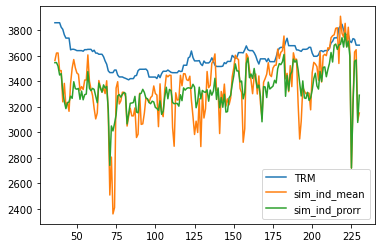

In [164]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_mean'].notnull()][['TRM','sim_ind_mean','sim_ind_prorr']].plot()

In [165]:
comparacionIndiceVsSimulacion[:50]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
0,2020-09-09,2020-09-09,3757.21,NaN,NaN
1,2020-09-10,2020-09-10,3717.25,NaN,NaN
2,2020-09-11,2020-09-11,3700.28,NaN,NaN
3,2020-09-12,2020-09-12,3709.00,NaN,NaN
4,2020-09-13,2020-09-13,3709.00,NaN,NaN
5,2020-09-14,2020-09-14,3709.00,NaN,NaN
6,2020-09-15,2020-09-15,3697.00,NaN,NaN
7,2020-09-16,2020-09-16,3683.49,NaN,NaN
8,2020-09-17,2020-09-17,3703.86,NaN,NaN
9,2020-09-18,2020-09-18,3714.65,NaN,NaN


In [166]:
comparacionIndiceVsSimulacion[51:100]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
51,2020-11-15,2020-11-15,3639.95,3453.606903,3343.775422
52,2020-11-16,2020-11-16,3639.95,3328.273274,3257.769632
53,2020-11-17,2020-11-17,3639.95,3357.641579,3322.674962
54,2020-11-18,2020-11-18,3635.19,3335.081095,3254.201348
55,2020-11-19,2020-11-19,3647.73,3409.029211,3294.582910
56,2020-11-20,2020-11-20,3647.10,3409.603918,3299.419098
57,2020-11-21,2020-11-21,3649.90,3606.169940,3475.853561
58,2020-11-22,2020-11-22,3649.90,3400.242114,3344.693551
59,2020-11-23,2020-11-23,3649.90,3337.544718,3325.838244
60,2020-11-24,2020-11-24,3632.92,3287.307837,3343.893734


In [167]:
comparacionIndiceVsSimulacion[101:150]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
101,2021-01-05,2021-01-05,3420.78,3291.412500,3185.967944
102,2021-01-06,2021-01-06,3450.74,3043.654010,3171.899085
103,2021-01-07,2021-01-07,3428.04,3379.521141,3246.213537
104,2021-01-08,2021-01-08,3459.39,3159.409418,3140.153269
105,2021-01-10,2021-01-10,3478.11,3121.918471,3165.417939
106,2021-01-11,2021-01-11,3478.11,3333.653959,3275.260099
107,2021-01-12,2021-01-12,3478.11,3447.690762,3352.746624
108,2021-01-13,2021-01-13,3487.65,3434.478803,3262.446650
109,2021-01-14,2021-01-14,3478.36,3447.008483,3335.840550
110,2021-01-15,2021-01-15,3469.76,3445.818814,3324.174269


## 2.  buscar ley de potencia con tabla transacciones

In [168]:
DF_TRANSACCIONES_cop

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso,ciclo,importe
0,68,56,9729.799637,3097.871969,36,1.0,3.014167e+07
1,35,74,53666.150104,3397.158937,36,1.0,1.823124e+08
2,81,74,12176.851762,3397.158937,36,1.0,4.136670e+07
3,5,13,9593.845083,3445.138828,36,1.0,3.305213e+07
4,84,13,19123.321270,3445.138828,36,1.0,6.588250e+07
...,...,...,...,...,...,...,...
5082,649,729,289.856028,3760.107911,230,1.0,1.089890e+06
5083,649,707,39.535882,3776.528743,230,1.0,1.493084e+05
5084,649,690,0.477004,3783.751587,230,1.0,1.804864e+03
5085,649,687,0.292255,3823.336417,230,1.0,1.117388e+03


### Análisis Compradores

<AxesSubplot:>

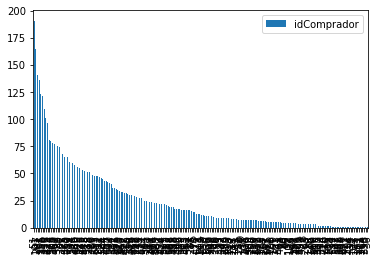

In [169]:
DF_TRANSACCIONES_cop['idComprador'].value_counts().to_frame().plot.bar()

<AxesSubplot:>

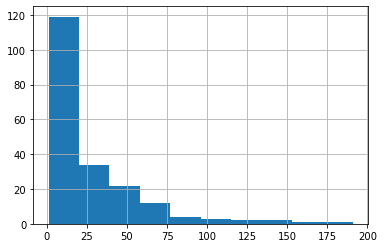

In [170]:
DF_TRANSACCIONES_cop['idComprador'].value_counts().hist()

<AxesSubplot:>

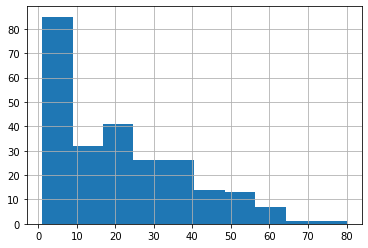

In [171]:
DF_TRANSACCIONES_cop['idVendedor'].value_counts().hist()

## Comportamiento Agentes específicos

In [172]:
df_estadoAgentes['id'].value_counts().to_frame('numTrans')

,numTrans
81,196
51,196
101,195
127,186
50,173
...,...
758,1
759,1
760,1
761,1


In [173]:
agente_longevo=df_estadoAgentes['id'].value_counts().to_frame('numTrans').index[0]
agente_longevo

81

In [174]:
#df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])]

In [175]:
df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])].set_index('pulso')

,id,TIPO,edad,capital,stockProducto,val_stock,val_empresa,ciclo
pulso,,,,,,,,
35,81,indefinido,0,9.794868e+08,617006.000000,2.380755e+09,2.331918e+18,1
36,81,comprador,1,6.750470e+08,679161.587592,2.620586e+09,3.295633e+09,1
37,81,comprador,2,4.820003e+08,719654.216103,2.720489e+09,3.202489e+09,1
38,81,comprador,3,4.347527e+08,722424.524045,2.721426e+09,3.156178e+09,1
39,81,indefinido,4,4.252410e+08,712901.743586,2.686169e+09,3.111410e+09,1
...,...,...,...,...,...,...,...,...
226,81,indefinido,191,8.482883e+07,229604.355043,8.740274e+08,9.588562e+08,1
227,81,indefinido,192,8.864115e+07,226577.780235,8.768533e+08,9.654945e+08,1
228,81,indefinido,193,9.173666e+07,223591.100816,8.609920e+08,9.527286e+08,1


<AxesSubplot:xlabel='pulso'>

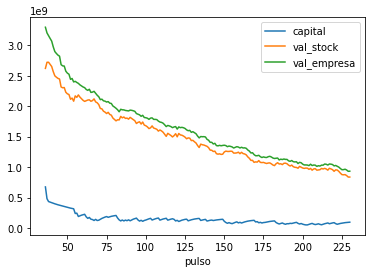

In [176]:
df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])].set_index('pulso')[['capital','val_stock','val_empresa']][1:].plot()

### Numero de transacciones por día

In [177]:
DF_TRANSACCIONES_cop['fechaPulso'].value_counts().to_frame('transDiarias').sort_index()

,transDiarias
36,22
37,18
38,18
39,17
40,14
...,...
226,51
227,33
228,20
229,31


<AxesSubplot:>

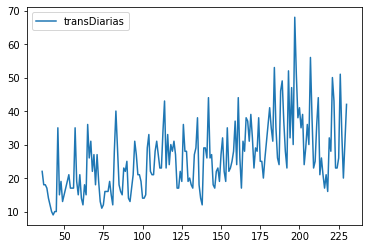

In [178]:
DF_TRANSACCIONES_cop['fechaPulso'].value_counts().to_frame('transDiarias').sort_index().plot()

In [179]:
## caracteristicas mejores agentes

In [180]:
## distribución mejores agentes en el tiempo

In [181]:
#exponente de hurst trm calculada

In [182]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
37,2020-11-01,2020-11-01,3858.56,3620.792698,3546.256575
38,2020-11-02,2020-11-02,3858.56,3621.624158,3517.704934
39,2020-11-03,2020-11-03,3858.56,3481.608872,3448.355461
40,2020-11-04,2020-11-04,3823.45,3483.523106,3459.531954
41,2020-11-05,2020-11-05,3807.13,3238.200445,3322.657704
...,...,...,...,...,...
226,2021-05-13,2021-05-13,3734.09,3238.233027,3219.337935
227,2021-05-14,2021-05-14,3728.09,3628.641667,3556.525488
228,2021-05-15,2021-05-15,3682.84,3646.675759,3566.541037
229,2021-05-16,2021-05-16,3682.84,3091.675883,3076.755584


In [183]:
from hurst import compute_Hc

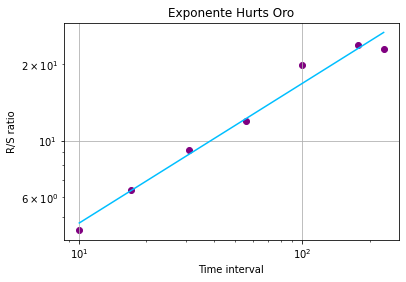

H=0.5491, c=1.3410


In [184]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion['TRM'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

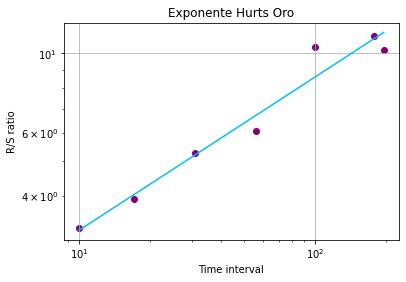

H=0.4284, c=1.1956


In [185]:
#H, c, data = compute_Hc(comparacionIndiceVsSimulacion[(comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO) and (comparacionIndiceVsSimulacion['sim_ind_prorr'].notnull())]['sim_ind_prorr'], kind='price', simplified=True)
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_prorr'].notnull()]['sim_ind_prorr'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [186]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][-100:]['sim_ind_prorr']

131    3316.155020
132    3312.884281
133    3333.180073
134    3243.333693
135    3330.469755
          ...     
226    3219.337935
227    3556.525488
228    3566.541037
229    3076.755584
230    3290.552833
Name: sim_ind_prorr, Length: 100, dtype: float64

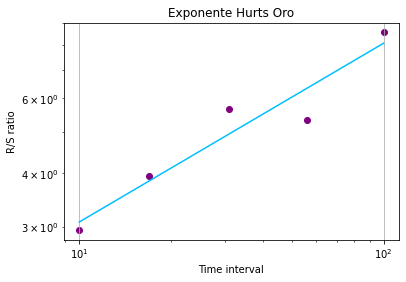

H=0.4187, c=1.1744


In [187]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][-100:]['sim_ind_prorr'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

### 3 temas
* hacer un lazo cerrado para validar si mejora el exponente de hurst
* validar los puntos más bajos de pronóstico y validar como tratarlos
* mirar las lecturas de los mejores

# Repetir con mayor complejidad

In [145]:
#252-FECHA_PULSO

In [146]:
#FECHA_INICIAL_PULSO=36
#CICLO

In [189]:
#for generacion in range(0,100,1):
for aux_ciclo in range(0,2,1):
    CICLO=CICLO+1
    FECHA_PULSO=FECHA_INICIAL_PULSO
    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
    for generacion in range(0,len(calendario)-FECHA_INICIAL_PULSO,1):
        aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
        if tipo_indice=='real' or generacion==0 or len(aux_df_transacciones)==0:
            VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
        elif tipo_indice=='emergente':            
            aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
            #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
            VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()

        POBLACION_ACTUAL=len(universo)
        quiebraEmpresas()# capturar información de agentes quebrados
        POBLACION_ACTUAL=len(universo)
        print("PULSO: ",FECHA_PULSO, "Generacion: ",generacion, " poblacion actual: ",POBLACION_ACTUAL,' numero acumulado agentes: ',NUMERO_ACUMULADO_AGENTES)
        nuevosAgentes()
        #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))
        pronosticoUniverso()
        compradoresActivos=[]
        vendedoresActivos=[]
        activacionUniverso()
        #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
        transaccionarUniverso()
        #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
        vivirUniverso()
        #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores) )
        ## capturar estado empresas
        aux_df_agent=pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agent['val_stock']=aux_df_agent['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agent['val_empresa']=aux_df_agent['val_stock']+aux_df_agent['capital']
        aux_df_agent['pulso']=FECHA_PULSO
        aux_df_agent['ciclo']=CICLO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agent)
        """
        if len(compradores)>0:
            aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
            aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
            aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']+aux_df_agentC['capital']
            aux_df_agentC['pulso']=FECHA_PULSO
            aux_df_agentC['ciclo']=CICLO
            df_estadoAgentes=df_estadoAgentes.append(aux_df_agentC)

        if len(vendedores)>0:
            aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
            aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
            aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']+aux_df_agentV['capital']
            aux_df_agentV['pulso']=FECHA_PULSO
            aux_df_agentV['ciclo']=CICLO
            df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
        """

        FECHA_PULSO=FECHA_PULSO+1

PULSO:  36 Generacion:  0  poblacion actual:  146  numero acumulado agentes:  762
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  146 pob final:  147
PULSO:  37 Generacion:  1  poblacion actual:  141  numero acumulado agentes:  763
max_generacion_agentes:  0.05 nuevos Agentes:  6 pob actual:  141 pob final:  147
PULSO:  38 Generacion:  2  poblacion actual:  145  numero acumulado agentes:  769
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  145 pob final:  147
PULSO:  39 Generacion:  3  poblacion actual:  143  numero acumulado agentes:  771
max_generacion_agentes:  0.05 nuevos Agentes:  5 pob actual:  143 pob final:  148
PULSO:  40 Generacion:  4  poblacion actual:  146  numero acumulado agentes:  776
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  146 pob final:  146
PULSO:  41 Generacion:  5  poblacion actual:  143  numero acumulado agentes:  776
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  143 pob final:  146
PULSO:  42 Gener

PULSO:  86 Generacion:  50  poblacion actual:  148  numero acumulado agentes:  915
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  148 pob final:  151
PULSO:  87 Generacion:  51  poblacion actual:  148  numero acumulado agentes:  918
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  148 pob final:  148
PULSO:  88 Generacion:  52  poblacion actual:  146  numero acumulado agentes:  918
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  146 pob final:  146
PULSO:  89 Generacion:  53  poblacion actual:  141  numero acumulado agentes:  918
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  141 pob final:  144
PULSO:  90 Generacion:  54  poblacion actual:  141  numero acumulado agentes:  921
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  141 pob final:  145
PULSO:  91 Generacion:  55  poblacion actual:  142  numero acumulado agentes:  925
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  142 pob final:  146
PULSO:  92

PULSO:  136 Generacion:  100  poblacion actual:  156  numero acumulado agentes:  1080
max_generacion_agentes:  0.05 nuevos Agentes:  5 pob actual:  156 pob final:  161
PULSO:  137 Generacion:  101  poblacion actual:  158  numero acumulado agentes:  1085
max_generacion_agentes:  0.05 nuevos Agentes:  7 pob actual:  158 pob final:  165
PULSO:  138 Generacion:  102  poblacion actual:  160  numero acumulado agentes:  1092
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  160 pob final:  161
PULSO:  139 Generacion:  103  poblacion actual:  157  numero acumulado agentes:  1093
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  157 pob final:  158
PULSO:  140 Generacion:  104  poblacion actual:  154  numero acumulado agentes:  1094
max_generacion_agentes:  0.05 nuevos Agentes:  7 pob actual:  154 pob final:  161
PULSO:  141 Generacion:  105  poblacion actual:  159  numero acumulado agentes:  1101
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  159 pob fina

PULSO:  185 Generacion:  149  poblacion actual:  118  numero acumulado agentes:  1208
max_generacion_agentes:  0.05 nuevos Agentes:  5 pob actual:  118 pob final:  123
PULSO:  186 Generacion:  150  poblacion actual:  120  numero acumulado agentes:  1213
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  120 pob final:  124
PULSO:  187 Generacion:  151  poblacion actual:  122  numero acumulado agentes:  1217
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  122 pob final:  122
PULSO:  188 Generacion:  152  poblacion actual:  121  numero acumulado agentes:  1217
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  121 pob final:  121
PULSO:  189 Generacion:  153  poblacion actual:  119  numero acumulado agentes:  1217
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  119 pob final:  123
PULSO:  190 Generacion:  154  poblacion actual:  120  numero acumulado agentes:  1221
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  120 pob fina

PULSO:  39 Generacion:  3  poblacion actual:  107  numero acumulado agentes:  1307
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  107 pob final:  111
PULSO:  40 Generacion:  4  poblacion actual:  109  numero acumulado agentes:  1311
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  109 pob final:  112
PULSO:  41 Generacion:  5  poblacion actual:  111  numero acumulado agentes:  1314
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  111 pob final:  115
PULSO:  42 Generacion:  6  poblacion actual:  113  numero acumulado agentes:  1318
max_generacion_agentes:  0.05 nuevos Agentes:  5 pob actual:  113 pob final:  118
PULSO:  43 Generacion:  7  poblacion actual:  114  numero acumulado agentes:  1323
max_generacion_agentes:  0.05 nuevos Agentes:  5 pob actual:  114 pob final:  119
PULSO:  44 Generacion:  8  poblacion actual:  118  numero acumulado agentes:  1328
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  118 pob final:  121
PULSO:  45

PULSO:  89 Generacion:  53  poblacion actual:  129  numero acumulado agentes:  1460
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  129 pob final:  129
PULSO:  90 Generacion:  54  poblacion actual:  126  numero acumulado agentes:  1460
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  126 pob final:  127
PULSO:  91 Generacion:  55  poblacion actual:  123  numero acumulado agentes:  1461
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  123 pob final:  123
PULSO:  92 Generacion:  56  poblacion actual:  120  numero acumulado agentes:  1461
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  120 pob final:  123
PULSO:  93 Generacion:  57  poblacion actual:  118  numero acumulado agentes:  1464
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  118 pob final:  122
PULSO:  94 Generacion:  58  poblacion actual:  118  numero acumulado agentes:  1468
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  118 pob final:  122
PULS

PULSO:  139 Generacion:  103  poblacion actual:  81  numero acumulado agentes:  1546
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  81 pob final:  82
PULSO:  140 Generacion:  104  poblacion actual:  79  numero acumulado agentes:  1547
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  79 pob final:  82
PULSO:  141 Generacion:  105  poblacion actual:  79  numero acumulado agentes:  1550
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  79 pob final:  82
PULSO:  142 Generacion:  106  poblacion actual:  80  numero acumulado agentes:  1553
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  80 pob final:  81
PULSO:  143 Generacion:  107  poblacion actual:  77  numero acumulado agentes:  1554
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  77 pob final:  77
PULSO:  144 Generacion:  108  poblacion actual:  73  numero acumulado agentes:  1554
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  73 pob final:  75
PULSO:  14

PULSO:  189 Generacion:  153  poblacion actual:  58  numero acumulado agentes:  1610
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  58 pob final:  59
PULSO:  190 Generacion:  154  poblacion actual:  59  numero acumulado agentes:  1611
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  59 pob final:  60
PULSO:  191 Generacion:  155  poblacion actual:  59  numero acumulado agentes:  1612
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  59 pob final:  59
PULSO:  192 Generacion:  156  poblacion actual:  57  numero acumulado agentes:  1612
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  57 pob final:  59
PULSO:  193 Generacion:  157  poblacion actual:  59  numero acumulado agentes:  1614
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  59 pob final:  61
PULSO:  194 Generacion:  158  poblacion actual:  60  numero acumulado agentes:  1616
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  60 pob final:  61
PULSO:  19

## Validacion resultado

In [191]:
DF_TRANSACCIONES

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso,ciclo
0,68.0,56.0,9.729800e+03,3097.871969,36.0,1.0
1,35.0,74.0,5.366615e+04,3397.158937,36.0,1.0
2,81.0,74.0,1.217685e+04,3397.158937,36.0,1.0
3,5.0,13.0,9.593845e+03,3445.138828,36.0,1.0
4,84.0,13.0,1.912332e+04,3445.138828,36.0,1.0
...,...,...,...,...,...,...
13995,1558.0,1624.0,5.371083e-08,3458.721651,230.0,5.0
13996,1540.0,1630.0,2.604223e+00,3596.098145,230.0,5.0
13997,1599.0,1637.0,3.100309e+01,3753.037984,230.0,5.0
13998,1572.0,1634.0,3.573400e-05,3786.445135,230.0,5.0


In [192]:
DF_TRANSACCIONES_cop=DF_TRANSACCIONES.copy()
DF_TRANSACCIONES_cop['importe']=DF_TRANSACCIONES_cop['cantidadTransaccion']*DF_TRANSACCIONES_cop['precioTransaccion']
#DF_TRANSACCIONES_cop.index=DF_TRANSACCIONES_cop.index.astype(int)
DF_TRANSACCIONES_cop['idComprador']=DF_TRANSACCIONES_cop['idComprador'].astype(int)
DF_TRANSACCIONES_cop['idVendedor']=DF_TRANSACCIONES_cop['idVendedor'].astype(int)
DF_TRANSACCIONES_cop['fechaPulso']=DF_TRANSACCIONES_cop['fechaPulso'].astype(int)

In [193]:
indice_simulacion=DF_TRANSACCIONES_cop[['ciclo','fechaPulso','precioTransaccion','cantidadTransaccion','importe']].groupby(['fechaPulso','ciclo']).agg(['mean','sum'])
indice_simulacion

precioTransaccion                cantidadTransaccion  \
                              mean            sum                mean   
fechaPulso ciclo                                                        
36         1.0         3545.258097   77995.678143        58128.666065   
           4.0         3540.855586   95603.100815        11992.185057   
           5.0         3563.467156  128284.817607        16111.687712   
37         1.0         3546.256575   63832.618349        80180.267567   
           4.0         3738.811324  142074.830307        15236.328287   
...                            ...            ...                 ...   
229        4.0         3687.202553   77431.253617         2045.122179   
           5.0         3604.427127   32439.844139          138.252526   
230        1.0         3290.552833  138203.218992         8823.848165   
           4.0         3586.640080   60972.881367         2152.915709   
           5.0         3535.793839   28286.350708           61.524824   

                                     importe                
                           sum          mean           sum  
fechaPulso ciclo                                            
36         1.0    1.278831e+06  2.070680e+08  4.555495e+09  
           4.0    3.237890e+05  4.476240e+07  1.208585e+09  
           5.0    5.800208e+05  5.730944e+07  2.063140e+09  
37         1.0    1.443245e+06  2.903161e+08  5.225690e+09  
           4.0    5.789805e+05  5.809596e+07  2.207646e+09  
...                        ...           ...           ...  
229        4.0    4.294757e+04  7.650129e+06  1.606527e+08  
           5.0    1.244273e+03  4.801762e+05  4.321586e+06  
230        1.0    3.706016e+05  2.780142e+07  1.167659e+09  
           4.0    3.659957e+04  7.035413e+06  1.196020e+08  
           5.0    4.921986e+02  2.017352e+05  1.613882e+06  

[585 rows x 6 columns]

In [194]:
indice_simulacion.columns = indice_simulacion.columns.map('|'.join).str.strip('|')
indice_simulacion['indiceProrr']=indice_simulacion['importe|sum']/indice_simulacion['cantidadTransaccion|sum']
indice_simulacion=indice_simulacion[['indiceProrr','precioTransaccion|mean']]
indice_simulacion.columns=['sim_ind_mean','sim_ind_prorr']
indice_simulacion

sim_ind_mean  sim_ind_prorr
fechaPulso ciclo                             
36         1.0     3562.235123    3545.258097
           4.0     3732.630677    3540.855586
           5.0     3557.010115    3563.467156
37         1.0     3620.792698    3546.256575
           4.0     3812.989481    3738.811324
...                        ...            ...
229        4.0     3740.670873    3687.202553
           5.0     3473.182041    3604.427127
230        1.0     3150.713219    3290.552833
           4.0     3267.853242    3586.640080
           5.0     3278.923477    3535.793839

[585 rows x 2 columns]

In [195]:
indice_simulacion=indice_simulacion[['sim_ind_prorr']].reset_index()

In [196]:
indice_simulacion

,fechaPulso,ciclo,sim_ind_prorr
0,36,1.0,3545.258097
1,36,4.0,3540.855586
2,36,5.0,3563.467156
3,37,1.0,3546.256575
4,37,4.0,3738.811324
...,...,...,...
580,229,4.0,3687.202553
581,229,5.0,3604.427127
582,230,1.0,3290.552833
583,230,4.0,3586.640080


In [197]:
indice_simulacion=pd.pivot_table(indice_simulacion, index=['fechaPulso'], columns=['ciclo'],values='sim_ind_prorr').reset_index()

In [198]:
comparacionIndiceVsSimulacion=calendario.merge(datos_trm[['date','TRM']], left_on='Date', right_on='date', how='left')

In [199]:
indice_simulacion

ciclo,fechaPulso,1.0,4.0,5.0
0,36,3545.258097,3540.855586,3563.467156
1,37,3546.256575,3738.811324,3601.182730
2,38,3517.704934,3672.511009,3544.615493
3,39,3448.355461,3654.671940,3692.067955
4,40,3459.531954,3631.734661,3696.606260
...,...,...,...,...
190,226,3219.337935,3643.993438,3505.742371
191,227,3556.525488,3748.412340,3528.964008
192,228,3566.541037,3669.890895,3561.532115
193,229,3076.755584,3687.202553,3604.427127


In [200]:
comparacionIndiceVsSimulacion=comparacionIndiceVsSimulacion.merge(indice_simulacion, left_index=True, right_on='fechaPulso', how='left')

In [201]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['fechaPulso']>=36]

,Date,date,TRM,fechaPulso,1.0,4.0,5.0
0.0,2020-10-31,2020-10-31,3858.56,36,3545.258097,3540.855586,3563.467156
1.0,2020-11-01,2020-11-01,3858.56,37,3546.256575,3738.811324,3601.182730
2.0,2020-11-02,2020-11-02,3858.56,38,3517.704934,3672.511009,3544.615493
3.0,2020-11-03,2020-11-03,3858.56,39,3448.355461,3654.671940,3692.067955
4.0,2020-11-04,2020-11-04,3823.45,40,3459.531954,3631.734661,3696.606260
...,...,...,...,...,...,...,...
190.0,2021-05-13,2021-05-13,3734.09,226,3219.337935,3643.993438,3505.742371
191.0,2021-05-14,2021-05-14,3728.09,227,3556.525488,3748.412340,3528.964008
192.0,2021-05-15,2021-05-15,3682.84,228,3566.541037,3669.890895,3561.532115
193.0,2021-05-16,2021-05-16,3682.84,229,3076.755584,3687.202553,3604.427127


<AxesSubplot:>

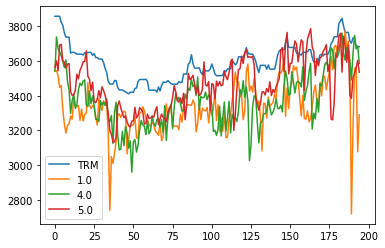

In [203]:
#comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['fechaPulso']>=36][['TRM',1,2,3,4]].plot()
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['fechaPulso']>=36][['TRM',1,4,5]].plot()

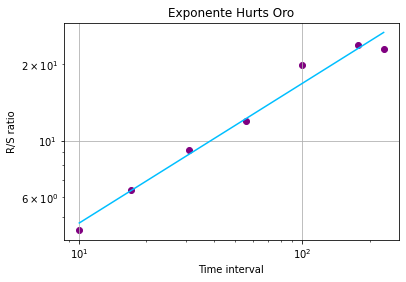

H=0.5491, c=1.3410


In [204]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion['TRM'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

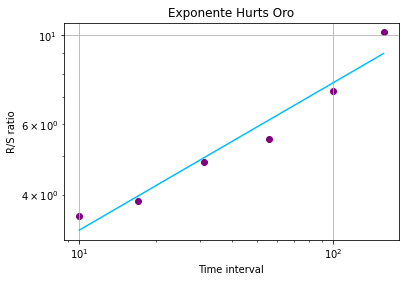

H=0.3671, c=1.4027


In [205]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][1], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

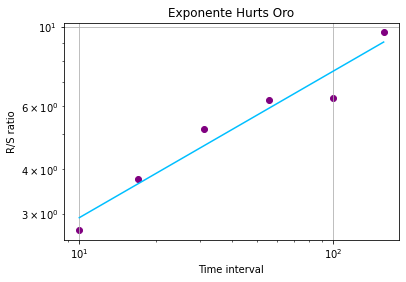

H=0.4096, c=1.1390


In [206]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][4], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

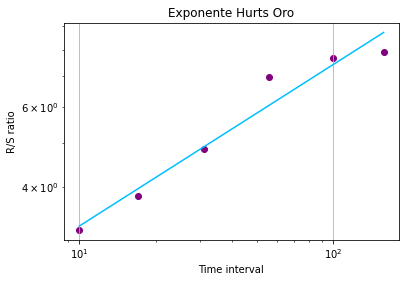

H=0.3543, c=1.4510


In [207]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][5], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
DF_TRANSACCIONES_cop['fechaPulso'].value_counts().to_frame('transDiarias').sort_index().plot()

<AxesSubplot:>

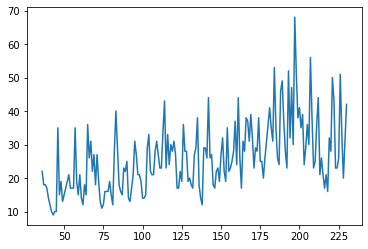

In [208]:
#DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==1].value_counts().to_frame('transDiarias').sort_index().plot()
DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==1]['fechaPulso'].value_counts().sort_index().plot()

In [ ]:
DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==2]['fechaPulso'].value_counts().sort_index().plot()

In [ ]:
DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==3]['fechaPulso'].value_counts().sort_index().plot()

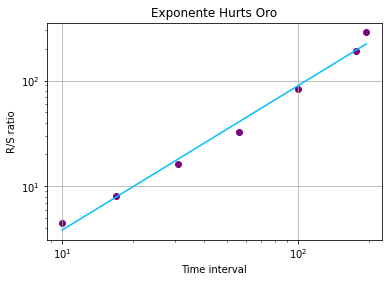

H=1.3645, c=0.1667


In [209]:
H, c, data = compute_Hc(DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==1]['fechaPulso'].value_counts(), kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
H, c, data = compute_Hc(DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==2]['fechaPulso'].value_counts(), kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

### Guardar resultados Parciales

In [ ]:
path='resultadoTRM3'

In [ ]:
DF_TRANSACCIONES_cop.to_csv(path+'/DF_TRANSACCIONES_cop.csv')

In [ ]:
comparacionIndiceVsSimulacion.to_csv(path+'/comparacionIndiceVsSimulacion.csv')

In [ ]:
pd.DataFrame.from_dict(agentesQuebrados).to_csv(path+'/agentesQuebrados.csv')

In [ ]:
df_estadoAgentes.to_csv(path+'/df_estadoAgentes.csv')

# RECORTES

In [ ]:
## Validación  transacciones

In [ ]:
generacion=0

In [ ]:
aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
aux_df_transacciones

In [ ]:
if tipo_indice=='real' or generacion==0 or len(aux_df_transacciones)==0:
    print('trm real')
    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [ ]:
FECHA_PULSO

In [ ]:
VALOR_MOMENTO_INDICE

In [ ]:
POBLACION_ACTUAL=len(compradores)+len(vendedores) 
POBLACION_ACTUAL

In [ ]:
quiebraEmpresas()

In [ ]:
POBLACION_ACTUAL=len(compradores)+len(vendedores) 
POBLACION_ACTUAL

In [ ]:
nuevosAgentes()

In [ ]:
POBLACION_ACTUAL=len(compradores)+len(vendedores) 
POBLACION_ACTUAL

In [ ]:
pronosticoUniverso()

In [ ]:
### validar pronosticos 
val_pron_compradores=pd.DataFrame.from_dict(compradores)
#val_pron_compradores

In [ ]:
val_pron_compradores['pronosticos_dia_siguiente'].describe()

In [ ]:
val_pron_vendedores=pd.DataFrame.from_dict(vendedores)
val_pron_vendedores['pronosticos_dia_siguiente'].describe()

In [ ]:
compradoresActivos=[]
vendedoresActivos=[]

In [ ]:
activacionUniverso()

In [ ]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

In [ ]:
val_pron_compradores=pd.DataFrame.from_dict(compradores)
val_pron_compradores['precioNegociacion'].describe()

In [ ]:
val_pron_vendedores=pd.DataFrame.from_dict(vendedores)
val_pron_vendedores['precioNegociacion'].describe()

In [ ]:
#fin validación transacciones

# nuevo sistema de agentes

In [ ]:
*  solu uno universo
*  precio de neg igual al ultimo oficial
* se calcular vend y comp activos según estado
* qutar variables clientes 